In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.linspace(0,10, 500)
y = np.cumsum(np.random.randn(500, 6) , 0)

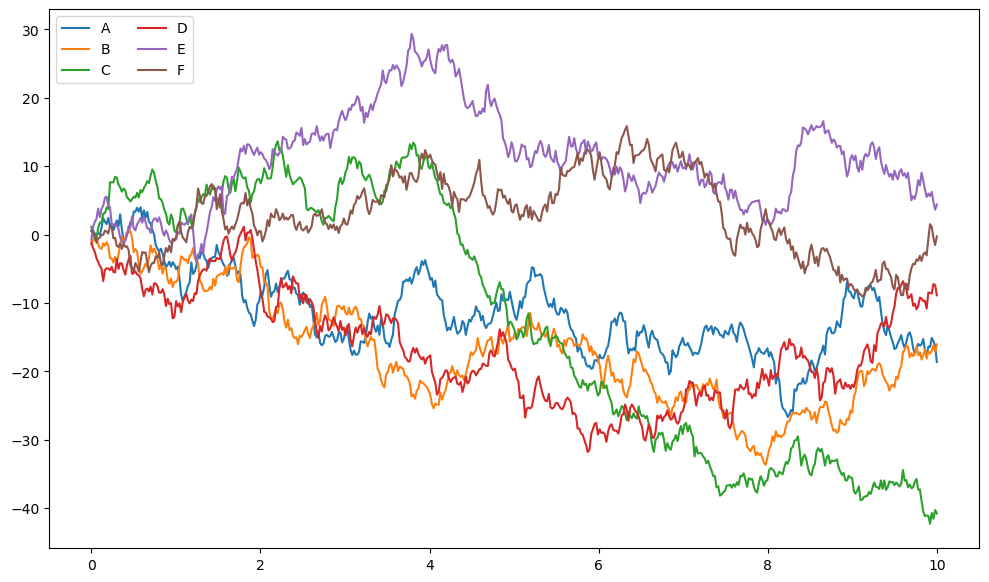

In [8]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2 ,loc='upper left')

In [48]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume' , 
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


In [49]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2025-05-18 19:58:15.851263')

In [50]:
btc = get_historic_price('btc', after=last_week)
btc.head()
# btc.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-05-18 20:00:00,103939.1,104266.0,103346.2,104115.1,274.185916
2025-05-18 21:00:00,104104.1,104583.3,104104.1,104269.1,33.210189
2025-05-18 22:00:00,104269.1,105991.0,104049.0,105975.6,160.242884
2025-05-18 23:00:00,105952.1,106631.8,105537.8,106525.6,140.270004
2025-05-19 00:00:00,106525.6,107042.1,105205.3,105264.0,172.771831


In [35]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2025-05-18 20:00:00 to 2025-05-25 13:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   162 non-null    float64
 1   HighPrice   162 non-null    float64
 2   LowPrice    162 non-null    float64
 3   ClosePrice  162 non-null    float64
 4   Volume      162 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


In [33]:
eth = get_historic_price('eth', after=last_week)
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-05-18 20:00:00,2409.91,2409.91,2308.00,2394.49,5647.583723
2025-05-18 21:00:00,2394.91,2434.10,2394.74,2408.34,1145.352534
2025-05-18 22:00:00,2408.34,2457.45,2378.40,2457.45,1053.401833
2025-05-18 23:00:00,2455.65,2509.99,2437.81,2497.69,2196.674720
2025-05-19 00:00:00,2498.98,2513.31,2430.00,2444.49,1456.130632


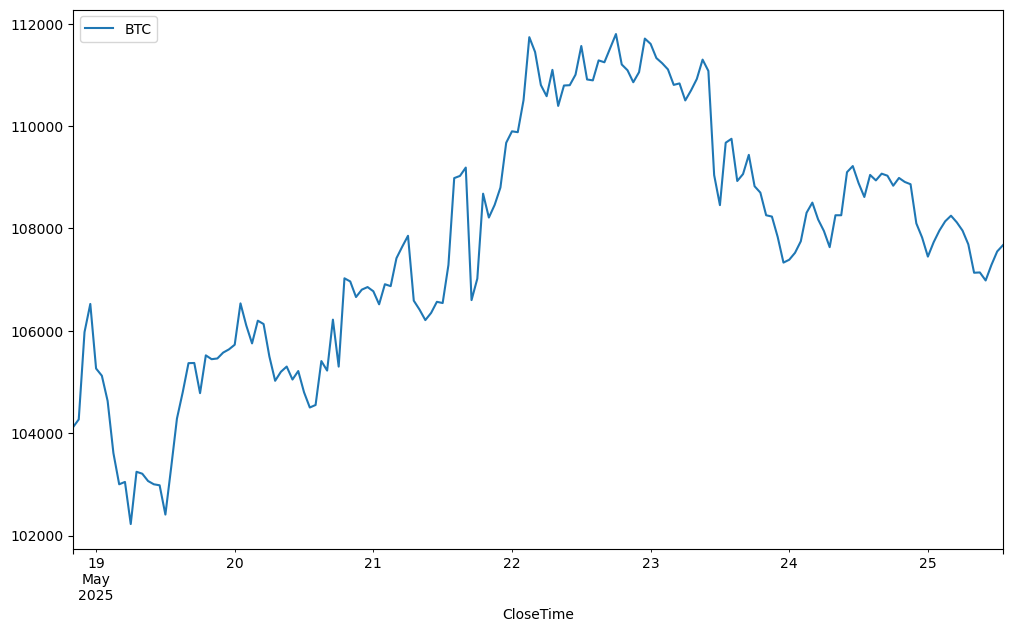

In [69]:
# Set up matplotlib to display plots inline in 
ax = btc['ClosePrice'].plot(label='BTC', figsize=(12,7))
ax.legend( loc='upper left', ncol=2)

In [70]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [75]:
output_notebook()

Loading BokehJS ...

In [74]:
p1 = figure(x_axis_type="datetime",	 title="BTC Closing Price", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price (USD)"
p1.line(btc.index, btc['ClosePrice'], color='blue', legend_label='BTC')
# p1.line(eth.index, eth['ClosePrice'], color='green', legend_label='ETH')

p1.legend.location = "top_left"
show(p1)